In [13]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker


****

In [14]:
path = '../data/tweetsCov19_polarized_users_deletionratio_reputation.tsv'

df_tweetscov19 = pd.read_csv(path, sep='\t', error_bad_lines=False, names=[ "Username", 'politic', 'science', 'moderacy', 'Deletion_ratio', 'Reputation', 'is_deleted'])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (2216076, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,00008ca06f863b962f72cc9167d7978a,-1.0000,0.0000,-1.0000,0.0000,0.1828,False
1,00008de3f61d5f04329ee6867d5475b9,-1.0000,0.0000,1.0000,1.0000,0.6003,True
2,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
3,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
4,00016e20a3865cb74581803c27d27b89,-1.0000,0.0000,-1.0000,0.0000,0.5896,False


In [15]:
df_tweetscov19 = df_tweetscov19[df_tweetscov19['politic'] != 0]

print('Shape: ', df_tweetscov19.shape)
df_tweetscov19.head()

Shape:  (1973156, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,00008ca06f863b962f72cc9167d7978a,-1.0000,0.0000,-1.0000,0.0000,0.1828,False
1,00008de3f61d5f04329ee6867d5475b9,-1.0000,0.0000,1.0000,1.0000,0.6003,True
2,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
3,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
4,00016e20a3865cb74581803c27d27b89,-1.0000,0.0000,-1.0000,0.0000,0.5896,False


In [16]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [17]:
df = df_tweetscov19[['politic', 'Reputation']]
df = df.round(1)

In [18]:
df = df.groupby(['politic', 'Reputation']).size().reset_index(name='count')
print(df.shape)

(225, 3)


In [19]:
df.head(10)

,politic,Reputation,count
0,-1.0000,0.0000,9309
1,-1.0000,0.1000,24283
2,-1.0000,0.2000,34297
3,-1.0000,0.3000,46713
4,-1.0000,0.4000,64905
5,-1.0000,0.5000,152544
6,-1.0000,0.6000,75642
7,-1.0000,0.7000,61423
8,-1.0000,0.8000,67803
9,-1.0000,0.9000,119714


In [20]:
heatmap_data = pd.pivot_table(df, values='count', index=['Reputation'], columns=['politic'], aggfunc='sum', fill_value=0)

In [21]:
print(heatmap_data.shape)
#heatmap_data.head(10)
heatmap_data = heatmap_data.replace(np.nan, 0)

#heatmap_data.drop(index=df.index[:1],inplace=True)

(11, 21)


Text(626.1346437500001, 0.5, 'Number of tweets')

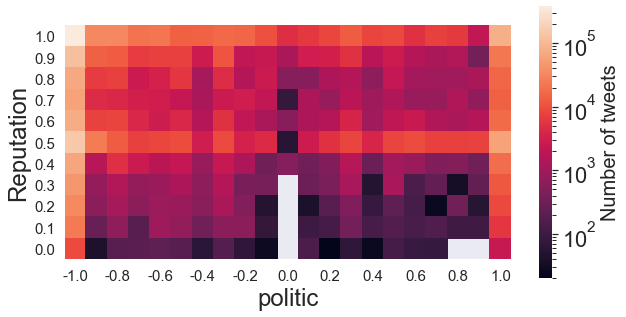

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap_data = heatmap_data.sort_values(by="Reputation",ascending=False)

sns.heatmap(data = heatmap_data, square=True, norm=matplotlib.colors.LogNorm(), cbar_kws={"shrink": 0.5})
ax.tick_params(labelsize=15)
ax.figure.axes[-1].set_ylabel('Number of tweets', size=20)


<ipython-input-26-b3425827c8a1>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  color.set_bad('white')    # if the value is bad the color would be lightblue instead of white


Text(624.7756437500002, 0.5, 'Number of tweets')

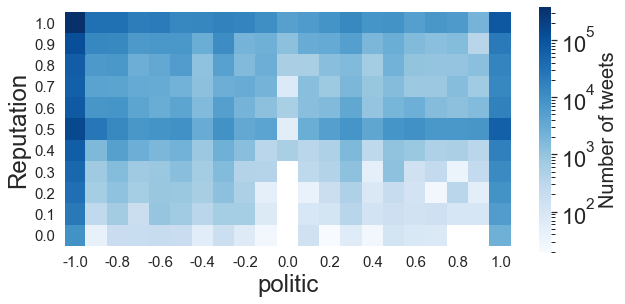

In [26]:
heatmap_data_2 = df.pivot("Reputation", "politic", "count")
heatmap_data_2 = heatmap_data_2.replace(np.nan, 0)
heatmap_data_2 = heatmap_data_2.sort_values(by="Reputation",ascending=False)

color = plt.get_cmap('Blues')   # default color
color.set_bad('white')    # if the value is bad the color would be lightblue instead of white

sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heatmap_data_2, square=True, norm= matplotlib.colors.LogNorm(), cbar_kws={"shrink": 0.45}, cmap=color)
ax.tick_params(labelsize=15)
ax.figure.axes[-1].set_ylabel('Number of tweets', size=20)



<ipython-input-24-a70bff5ca663>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  color.set_bad('white')    # if the value is bad the color would be lightblue instead of white


Text(397.6966437500001, 0.5, 'Number of tweets')

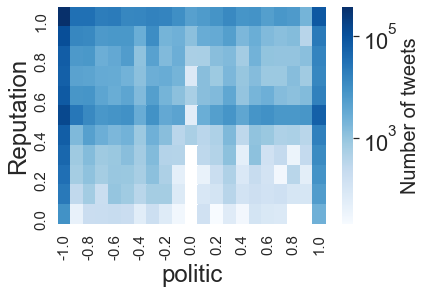

In [24]:
heatmap_data_2 = df.pivot("Reputation", "politic", "count")
heatmap_data_2 = heatmap_data_2.replace(np.nan, 0)
heatmap_data_2 = heatmap_data_2.sort_values(by="Reputation",ascending=False)

color = plt.get_cmap('Blues')   # default color
color.set_bad('white')    # if the value is bad the color would be lightblue instead of white

sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(heatmap_data_2, square=False, norm= matplotlib.colors.LogNorm(), cbar_kws={"shrink": 1}, cmap=color)
ax.tick_params(labelsize=15)
ax.figure.axes[-1].set_ylabel('Number of tweets', size=20)



In [25]:
heatmap_data_2.head()

politic,-1.0000,-0.9000,-0.8000,-0.7000,-0.6000,-0.5000,-0.4000,-0.3000,-0.2000,-0.1000,0.0000,0.1000,0.2000,0.3000,0.4000,0.5000,0.6000,0.7000,0.8000,0.9000,1.0000
Reputation,,,,,,,,,,,,,,,,,,,,,
1.0000,377177.0000,33149.0000,32223.0000,20997.0000,21972.0000,14048.0000,14421.0000,16924.0000,15608.0000,10381.0000,4985.0000,6244.0000,8559.0000,12959.0000,8294.0000,8934.0000,5457.0000,7740.0000,6579.0000,2106.0000,81393.0000
0.9000,119714.0000,14120.0000,12872.0000,6663.0000,7244.0000,7268.0000,2767.0000,11331.0000,2133.0000,2459.0000,1235.0000,3005.0000,3222.0000,5407.0000,1808.0000,2816.0000,1643.0000,1311.0000,1489.0000,359.0000,23014.0000
0.8000,67803.0000,6737.0000,7421.0000,2735.0000,3529.0000,6091.0000,1158.0000,4753.0000,1617.0000,2672.0000,553.0000,571.0000,1360.0000,1608.0000,682.0000,2295.0000,1077.0000,1049.0000,1030.0000,1315.0000,16105.0000
0.7000,61423.0000,4669.0000,4205.0000,3290.0000,3138.0000,2331.0000,1253.0000,2667.0000,3082.0000,2149.0000,77.0000,1333.0000,820.0000,1833.0000,969.0000,1452.0000,856.0000,836.0000,1402.0000,740.0000,14070.0000
0.6000,75642.0000,8006.0000,8123.0000,4050.0000,2875.0000,4041.0000,1658.0000,5380.0000,2175.0000,1230.0000,581.0000,1356.0000,1648.0000,3790.0000,1031.0000,2054.0000,2590.0000,1447.0000,1230.0000,1549.0000,17649.0000
